In [1]:
import tensorflow as tf
import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
tf.keras.utils.set_random_seed(17039)

In [3]:
dataset_folder = "dataset_full"
version = 2
batch_size = 50
run = 9
epochs = 300

In [4]:
labels = os.listdir(f".\\datasets\\raw\\{dataset_folder}")
train_dataset = tf.data.Dataset.load(f".\\datasets\\{dataset_folder}_version_{version}\\train_dataset")
val_dataset = tf.data.Dataset.load(f".\\datasets\\{dataset_folder}_version_{version}\\val_dataset")
test_dataset = tf.data.Dataset.load(f".\\datasets\\{dataset_folder}_version_{version}\\test_dataset")

In [5]:
train_dataset = train_dataset.shuffle(train_dataset.cardinality(), reshuffle_each_iteration=True).batch(batch_size)
val_dataset = val_dataset.shuffle(val_dataset.cardinality(), reshuffle_each_iteration=False).batch(val_dataset.cardinality())
test_dataset = test_dataset.shuffle(test_dataset.cardinality(), reshuffle_each_iteration=False).batch(test_dataset.cardinality())

In [6]:
model = keras.Sequential(name="PCGClassifier")
model.add(keras.Input(shape=(20000, 1)))
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=64, kernel_size=3, strides=3, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, strides=2, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool1D(pool_size=2))
model.add(keras.layers.Dropout(rate=0.15))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=5, activation="softmax"))
model.summary()

Model: "PCGClassifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9999, 64)          256       
                                                                 
 batch_normalization (BatchN  (None, 9999, 64)         256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 4999, 64)          12352     
                                                                 
 batch_normalization_1 (Batc  (None, 4999, 64)         256       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 2499, 64)          12352     
                                                                 
 batch_normalization_2 (Batc  (None, 2499, 64)       

In [7]:
model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.025), loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
os.mkdir(f".\\runs\\run_{run}")

In [9]:
min_val_loss_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    f".\\runs\\run_{run}\\min_val_loss_weights.h5",
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)
max_val_acc_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    f".\\runs\\run_{run}\\max_val_acc_weights.h5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [10]:
history = model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=[min_val_loss_checkpoint_callback, max_val_acc_checkpoint_callback],
    validation_data=val_dataset,
)

Epoch 1/300


16/16 [==============================] - 5s 128ms/step - loss: 2.6014 - accuracy: 0.2163 - val_loss: 1.6307 - val_accuracy: 0.2200
Epoch 2/300
16/16 [==============================] - 2s 108ms/step - loss: 2.0183 - accuracy: 0.3038 - val_loss: 1.5741 - val_accuracy: 0.2600
Epoch 3/300
16/16 [==============================] - 2s 105ms/step - loss: 1.6733 - accuracy: 0.3925 - val_loss: 1.5635 - val_accuracy: 0.2200
Epoch 4/300
16/16 [==============================] - 2s 105ms/step - loss: 1.5030 - accuracy: 0.4363 - val_loss: 1.5631 - val_accuracy: 0.2300
Epoch 5/300
16/16 [==============================] - 2s 107ms/step - loss: 1.2131 - accuracy: 0.5375 - val_loss: 1.5570 - val_accuracy: 0.2600
Epoch 6/300
16/16 [==============================] - 2s 107ms/step - loss: 1.1398 - accuracy: 0.5675 - val_loss: 1.5523 - val_accuracy: 0.3300
Epoch 7/300
16/16 [==============================] - 2s 114ms/step - loss: 0.9516 - accuracy: 0.6187 - val_loss: 1.5427 - val_accuracy: 0.3200
Epoch 8/300

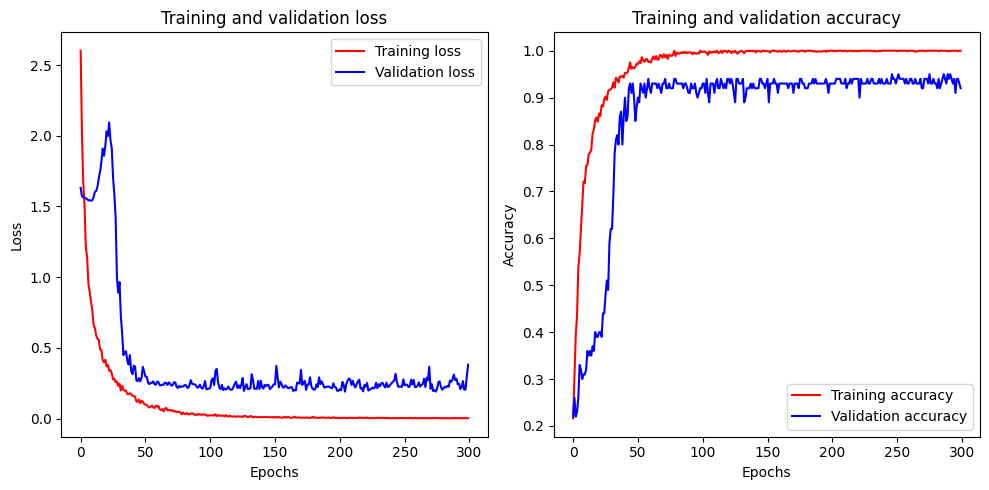

In [11]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epoch_list = range(epochs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(epoch_list, loss_values, 'r', label='Training loss')
ax1.plot(epoch_list, val_loss_values, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epoch_list, acc_values, 'r', label='Training accuracy')
ax2.plot(epoch_list, val_acc_values, 'b', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.savefig(f"runs\\run_{run}\\loss_and_accuracy_curves.png")

In [12]:
model.save(f".\\runs\\run_{run}\\model_{epochs}e.h5", save_format="h5")

In [13]:
loss, acc = model.evaluate(test_dataset)

1/1 [==============================] - 0s 107ms/step - loss: 0.2427 - accuracy: 0.9500


1/1 [==============================] - 0s 233ms/step


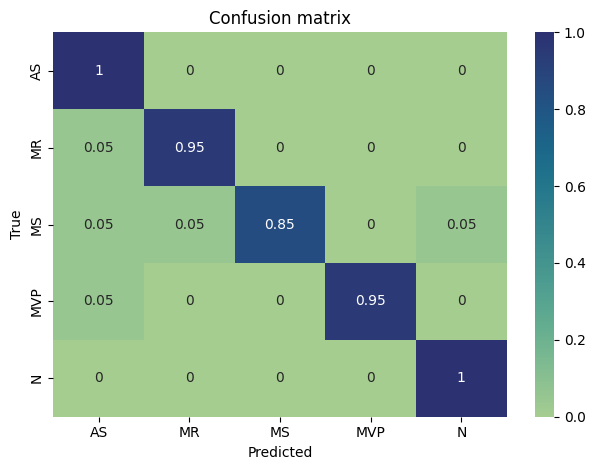

In [14]:
pred = model.predict(test_dataset)

true = next(test_dataset.as_numpy_iterator())[1]

y_true = np.argmax(true, axis=1)
y_pred = np.argmax(pred, axis=1)
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_mat_normalized, annot=True, xticklabels=labels, yticklabels=labels, cmap="crest")
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.savefig(f".\\runs\\run_{run}\\confusion_matrix.png")